# Assignment 3
&copy; 2023, Scripnic Dinu, all rights reserved


## 3.1 Mobile phone picture

In [ ]:
# all required libraries
from PIL import Image
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

### 3.1.1 
* Take a picture with your smartphone. The picture must contain a piece of paper with your name on it and 
some type of background (walls, floor, window, etc.).
* Resize it to a manageable size (e.g., 256x256) either with R or Py

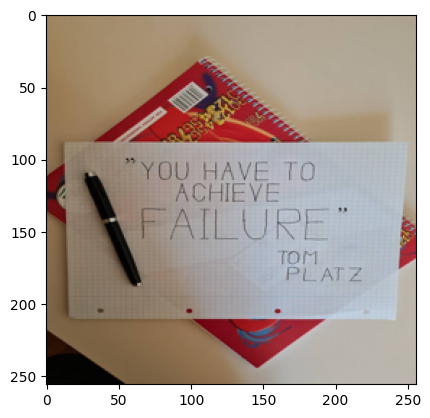

[[159 127  84]
 [159 127  84]
 [160 128  86]
 ...
 [185 178 170]
 [184 177 169]
 [183 176 168]]


In [19]:
# i choose to use pillow because it is easier and more efficient than opencv
# opencv is more for computer vision and other more complex tasks
# open and resize the image
img = Image.open("img.jpg")
img = img.resize((256, 256))
print('Original image size: ', img.size)
plt.imshow(img)
plt.show()
# now in order to use the image we have to convert it to a numpy array
img_array = np.array(img)
pixels = img_array.reshape((-1, 3))
print(pixels)

### 3.1.2
* Reduce the number of RGB colors in the image by using the k-means algorithm.

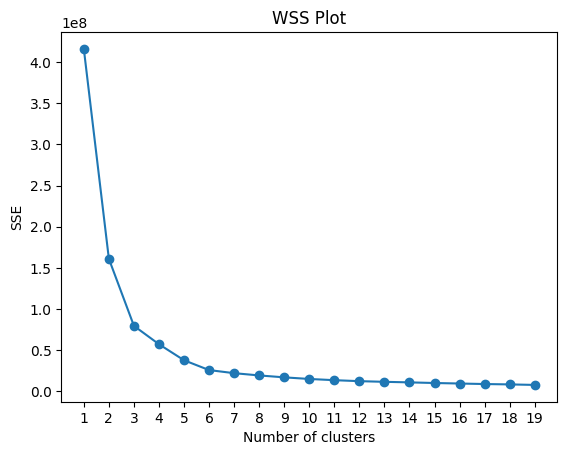

In [20]:
pixels = img_array.reshape((-1, 3))
# now we have to use the kmeans algorithm to cluster the pixels
k_list = np.arange(1,20, 1)
sse = list()
for k in k_list:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(pixels)
    sse.append(kmeans.inertia_)
plt.plot(k_list, sse, marker='o')
plt.xlabel("Number of clusters")
# set the x axis to be from 1 to 20 and to show each number
plt.xticks(k_list)
plt.ylabel("SSE")
plt.title("WSS Plot")
plt.show()


#### Conclusion
* Based on the results of the WSS plot evaluated using the Elbow method, the best K is 3.
### 3.1.3 Generate a new image with the reduced number of colors (Result from 3.1.2)

old image


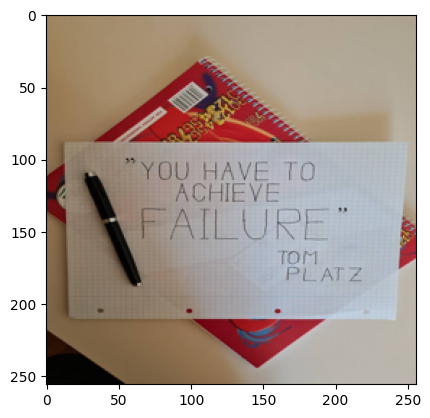

new image with k = 3


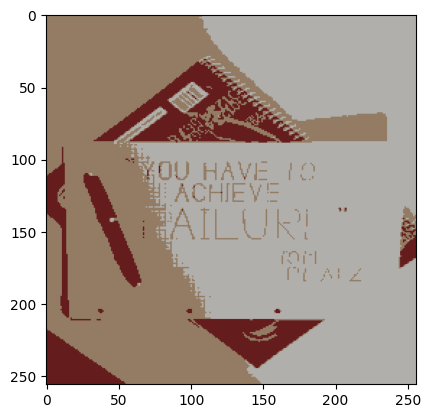

In [21]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(pixels)
labels = kmeans.labels_
labels = labels.reshape((256, 256))
new_pixels = kmeans.cluster_centers_[labels]
new_img_3 = Image.fromarray(new_pixels.astype(np.uint8), mode='RGB')
# show the old image
plt.imshow(img)
print("old image")
plt.show()
# show the new image
plt.imshow(new_img_3)
print("new image with k = 3")
plt.show()

#### Conclusion
* I consider the result to be good, but not perfect. The colors are not as sharp as they should be, but the image is still recognizable.
* I would increase the k value to 4 or 5 to get a better result.
### 3.1.4 Generation of a new image with the reduced number of colors (Result from personal observation)

Original image


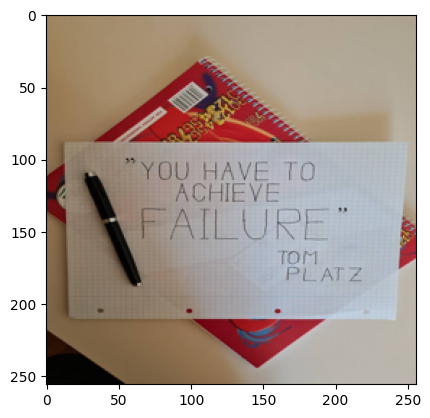

New image with k=4


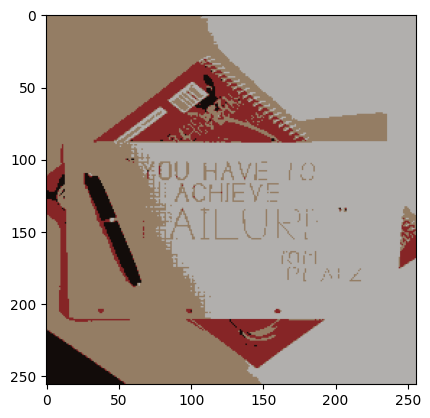

In [22]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(pixels)
labels = kmeans.labels_
labels = labels.reshape((256, 256))
new_pixels = kmeans.cluster_centers_[labels]
new_img_4 = Image.fromarray(new_pixels.astype(np.uint8), mode="RGB")
# show the old image
plt.imshow(img)
print("Original image")
plt.show()
# show the new image
plt.imshow(new_img_4)
print("New image with k=4")
plt.show()

The original image


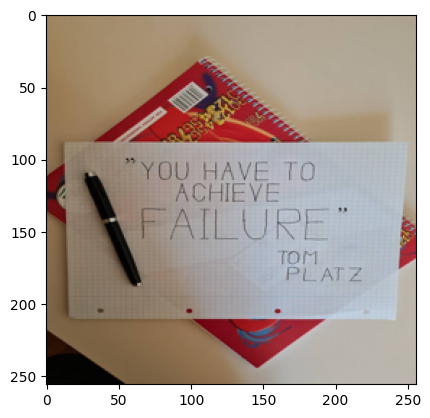

The new image with k = 5


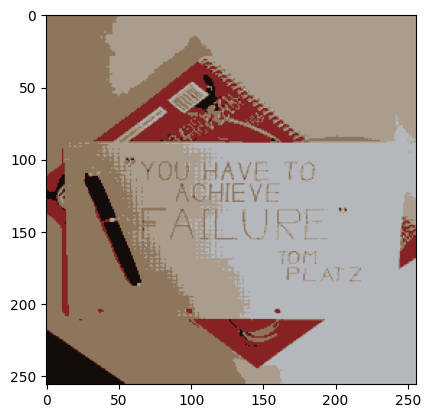

In [23]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(pixels)
labels = kmeans.labels_
labels = labels.reshape((256, 256))
new_pixels = kmeans.cluster_centers_[labels]
new_img_5 = Image.fromarray(new_pixels.astype(np.uint8), mode='RGB')
# show the old image
plt.imshow(img)
print("The original image")
plt.show()
# show the new image
plt.imshow(new_img_5)
print("The new image with k = 5")
plt.show()

#### Conclusion
* The k=4 gave a poor result, hardly distinguishable from k=3 image. Only change was the color of the notebook, it became more red.
* I consider the K=5 to be the best value for this image. The colors are good and the image is recognizable.
### 3.1.5 Final conclusion
* The best value for K is 5. The image is recognizable and the colors are good.
* The result from elbow was relatively good as well, k=3 is the second best value for this image. The colors were quite good, but the image was not as recognizable as the one from k=5.
* Further increase of K would give a very limited improvement that would not be worth the time spent.

The WSS plot


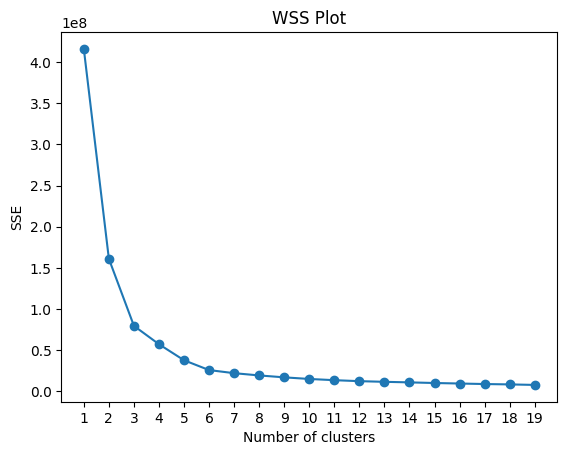

The original image


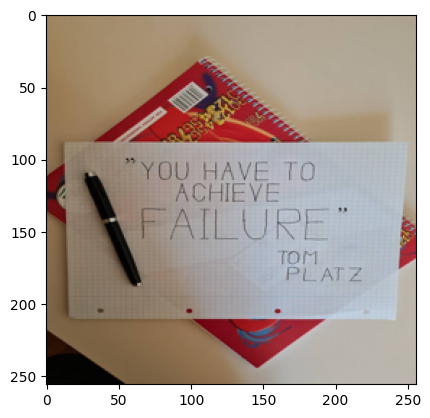

The new image with k = 3


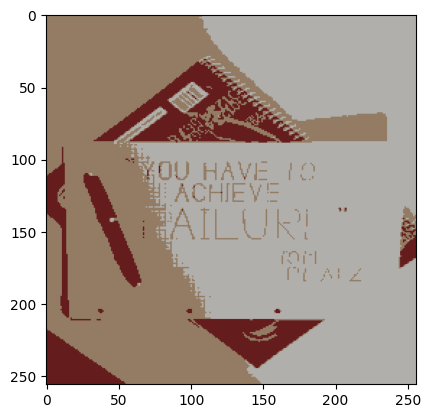

The new image with k = 5


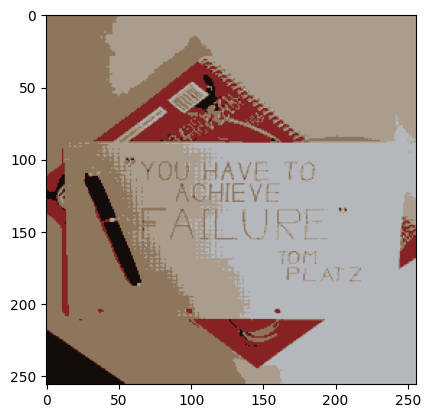

In [24]:
plt.plot(k_list, sse, marker='o')
plt.xlabel("Number of clusters")
# set the x axis to be from 1 to 20 and to show each number
plt.xticks(k_list)
plt.ylabel("SSE")
plt.title("WSS Plot")
print("The WSS plot")
plt.show()
plt.imshow(img)
print("The original image")
plt.show()
plt.imshow(new_img_3)
print("The new image with k = 3")
plt.show()
plt.imshow(new_img_5)
print("The new image with k = 5")
plt.show()

## 3.2 Drilling Machine